In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import numpy as np
import pygritbx

In [2]:
# Unit Vectors for defining reference frame
i = np.array([1, 0, 0])
j = np.array([0, 1, 0])
k = np.array([0, 0, 1])

In [3]:
# Axial dimensions on Shaft A1
a1 = 9 + 28.75 + 9 # [mm]
b1 = (13.25 - 9) + 24.25 + 30 / 2 # [mm]
zR1 = a1 + b1 # [mm]

In [4]:
# Axial dimension on shaft A1'
zR2 = 0 # [mm]
zR3 = 55 # [mm]

In [5]:
# Axial dimension on shaft A2
zR4 = 17 + 18 / 2 # [mm]
a2 = (46 - zR4) + 9.25 # [mm]
b2 = 16 + 25 + 16 # [mm]
c2 = (58.5 - 16) + 35 # [mm]


In [6]:
# Input
motor = pygritbx.Motor(name="M1", loc=0, power=6.25e3, n=2000, axis=k)

In [7]:
# Material
shaftMaterial = pygritbx.Material(name='34NiCrMo6', sigma_u=1050, sigma_y=950, sigma_Dm1=520, HB=0)
R1R4_material = pygritbx.Material(name='Steel', sigma_u=1060, sigma_y=950, sigma_Dm1=0, HB=335)
R2R3_material = pygritbx.Material(name='Steel', sigma_u=1950, sigma_y=1400, sigma_Dm1=0, HB=560)

In [8]:
# Gears
# R1
R1 = pygritbx.Gear(name="R1", axis=k, loc=zR1, m_n=2.5, z=18, psi=20, phi_n=20, Q_v=7, FW=30, material=R1R4_material)

# R2
R2 = pygritbx.Gear(name="R2", axis=k, loc=zR2, m_n=2.5, z=73, psi=-20, phi_n=20, Q_v=7, FW=30, material=R2R3_material)

# R3
R3 = pygritbx.Gear(name="R3", axis=k, loc=zR3, m_n=2.5, z=19, psi=-20, phi_n=20, Q_v=7, FW=30, material=R2R3_material)

# R4
R4 = pygritbx.Gear(name="R4", axis=k, loc=zR4, m_n=2.5, z=51, psi=20, phi_n=20, Q_v=7, FW=30, material=R1R4_material)

In [9]:
# Supports
# A (roller 30203)
A = pygritbx.Support(name="A", type="Roller", bearingType="Tapered", catalogueName="30203", catalogueType="Explorer",
                     d=17, D=40, B=13.25, C=23.4e3, C0=18.6e3, Pu=1.83e3, nr=15e3, a=9, e=0.35, X=0, Y=1.7, Y0=0.9, Y1=0,
                     Y2=0, A=0, kr=0, shoulder=-1, arr="B2B", axis=k, loc=0)

# B (roller 30203)
B = pygritbx.Support(name="B", type="Pin", bearingType="Tapered", catalogueName="30203", catalogueType="Explorer",
                     d=17, D=40, B=13.25, C=23.4e3, C0=18.6e3, Pu=1.83e3, nr=15e3, a=9, e=0.35, X=0, Y=1.7,Y0=0.9, Y1=0,
                     Y2=0, A=0, kr=0, shoulder=1, arr="B2B", axis=k, loc=a1)

# C (roller 30208)
C = pygritbx.Support(name="C", type="Roller", bearingType="Tapered", catalogueName="30208", catalogueType="Explorer",
                     d=40, D=80, B=19.75, C=75.8e3, C0=68e3, Pu=7.65e3, nr=7e3, a=16, e=0.37, X=0, Y=1.6, Y0=0.9, Y1=0,
                     Y2=0, A=0, kr=0, shoulder=-1, arr="B2B", axis=k, loc=zR4 + a2)

# D (roller 30208)
D = pygritbx.Support(name="D", type="Pin", bearingType="Tapered", catalogueName="30208", catalogueType="Explorer",
                     d=40, D=80, B=19.75, C=75.8e3, C0=68e3, Pu=7.65e3, nr=7e3, a=16, e=0.37, X=0, Y=1.6, Y0=0.9, Y1=0,
                     Y2=0, A=0, kr=0, shoulder=1, arr="B2B", axis=k, loc=zR4 + a2 + b2)

# F
F = pygritbx.Support(axis=k)

In [10]:
# Output Component
output = pygritbx.Component("Output", None, k, zR4 + a2 + b2 + c2)

In [11]:
# Gearbox Configuration
# Shaft A1
A1 = pygritbx.Shaft(name="A1", inputs=[motor], outputs=[R1], axis=k, material=shaftMaterial, sups=np.array([A, B]), loc=[0, 0, 0])
# Mesh M1
M1 = pygritbx.GearMesh(name="M1", drivingGear=R1, drivenGear=R2, axis=-j, type="External")
# Shaft A1'
A1_p = pygritbx.Shaft("A1'", [R2], [R3], -k, shaftMaterial, np.array([F, F]))
# Mesh M2
M2 = pygritbx.GearMesh("M2", R3, R4, j, "External")
# Shaft A2
A2 = pygritbx.Shaft("A2", [R4], [output], k, shaftMaterial, np.array([C, D]))

In [12]:
A1.solve()

Checking torque equilibrium for A1.
A1 does not mainatain a torque equilibrium.
Checking solvability for A1.
Solving torque equilibrium for A1.
Torque equilibrium for A1 is solved.
Checking torque equilibrium for R1.
R1 does not mainatain a torque equilibrium.
Checking solvability for R1.
Solving forces on R1 due to mesh M1.
Checking torque equilibrium for R1.
R1 mainatains a torque equilibrium.
Checking force equilibrium on A1.
A1 does not maintain a force equilibrium.
Axial reaction forces on A1: Case 1a
Checking force equilibrium on A1.
A1 maintains a force equilibrium.


In [13]:
R1.EFs[0].force, R1.ETs[0].torque

(array([-1246.30604654,   482.73051601,   453.61830373]),
 array([ -0.        ,  -0.        , -29.84155183]))

In [14]:
A.F_tot.force, B.F_tot.force

(array([-1159.66444972,   681.50190496, -1239.75087875]),
 array([ 2405.97049627, -1164.23242098,   786.13257502]))

In [15]:
R2.solve()

Checking torque equilibrium for R2.
Checking solvability for R2.
Solving torque equilibrium for R2.
Checking torque equilibrium for R2.
R2 mainatains a torque equilibrium.


In [16]:
A1_p.solve()

Checking torque equilibrium for A1'.
A1' does not mainatain a torque equilibrium.
Checking solvability for A1'.
Solving torque equilibrium for A1'.
Torque equilibrium for A1' is solved.
Checking torque equilibrium for R3.
R3 does not mainatain a torque equilibrium.
Checking solvability for R3.
Solving forces on R3 due to mesh M2.
Checking torque equilibrium for R3.
R3 mainatains a torque equilibrium.
Checking force equilibrium on A1'.
A1' does not maintain a force equilibrium.
Reaction forces on A1' won't be calculated.


In [17]:
R3.solve()

Checking torque equilibrium for R3.
R3 mainatains a torque equilibrium.
Nothing to be solved for R3.


In [18]:
R4.solve()

Checking torque equilibrium for R4.
Checking solvability for R4.
Solving torque equilibrium for R4.
Checking torque equilibrium for R4.
R4 mainatains a torque equilibrium.


In [19]:
Fout_r = np.abs(np.sum(R4.ETs[0].torque)) / 0.1 * j
Fout_a = 0.25 * np.abs(np.sum(Fout_r)) * (-k)
Fout = pygritbx.Force(Fout_a + Fout_r, output.abs_loc)
A2.outputs[0].updateEFs([Fout])

In [20]:
A2.solve()

Checking torque equilibrium for A2.
A2 does not mainatain a torque equilibrium.
Checking solvability for A2.
Solving torque equilibrium for A2.
Torque equilibrium for A2 is solved.
Checking force equilibrium on A2.
A2 does not maintain a force equilibrium.
Axial reaction forces on A2: Case 2a
Checking force equilibrium on A2.
A2 maintains a force equilibrium.


In [21]:
C.F_tot.force, D.F_tot.force

(array([-7245.66430798,  -463.91757327, -2268.90647658]),
 array([ 2457.22528705, -4639.32474446,  4823.89096417]))

In [22]:
# Shaft A2: profile for static verification
statProfile = pygritbx.ShaftProfile(np.array([34, 35, 35, 30, 30, 35, 35, 40, 40, 34, 34, 32, 32, 27, 27, 32, 32, 31]) / 2, 
                                  np.array([0, 1, 11.9, 12, 39.9, 40, 45.9, 46, 132.9, 133, 158.4, 158.5, 178.4, 178.5, 208.4, 208.5, 222, 223]))
statProfile.AddFillet(1, [2], 45, 18.5)
statProfile.AddFillet(1, [1], 134, 18)
statProfile_refined = statProfile.refineProfile(0.1)
A2.setProfile(statProfile_refined)
A2.profile.CalculateSectionProperties()

In [23]:
# Shaft A2: define sections
# v1
v1 = pygritbx.ShaftSection('V1', np.array([0, 0, 26]), 30, 0.8, shaftMaterial)
v1.AppendKf(np.array([1.6, 2]), np.array(["Bending", "Torsion"]))


In [24]:
# v2
v2 = pygritbx.ShaftSection('V2', np.array([0, 0, 46]), 40, 0.8, shaftMaterial)
v2.AddNotchSensitivity(1, A2.material.sigma_u)
v2.AddGeometricStressRaiser(1/35, 40/35)

In [25]:
# v3
v3 = pygritbx.ShaftSection('V3', np.array([0, 0, 133]), 40, 0.8, shaftMaterial)
v3.AddNotchSensitivity(1, A2.material.sigma_u)
v3.AddGeometricStressRaiser(1/34, 40/34)

In [26]:
userSections = np.array([v1, v2, v3])
A2.addSections(userSections)

In [27]:
# Internal loads
A2.calculateInternalLoads(np.array([i, j, k]))

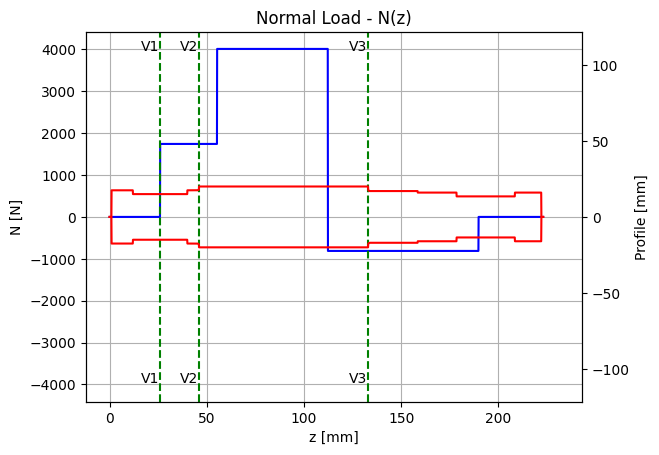

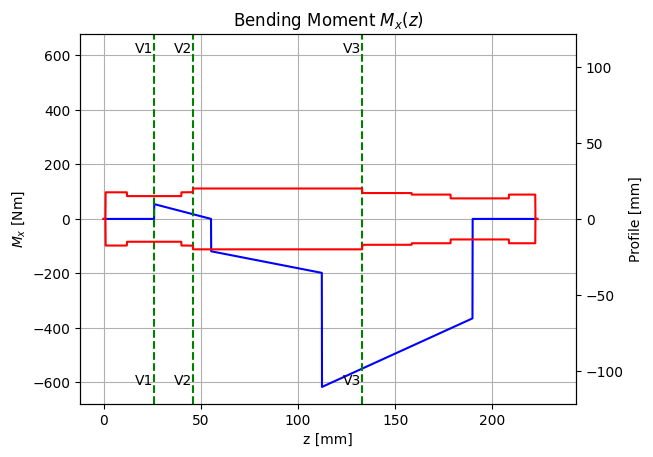

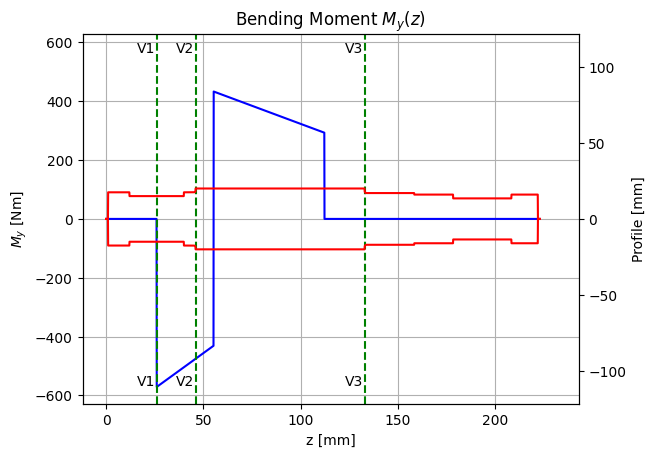

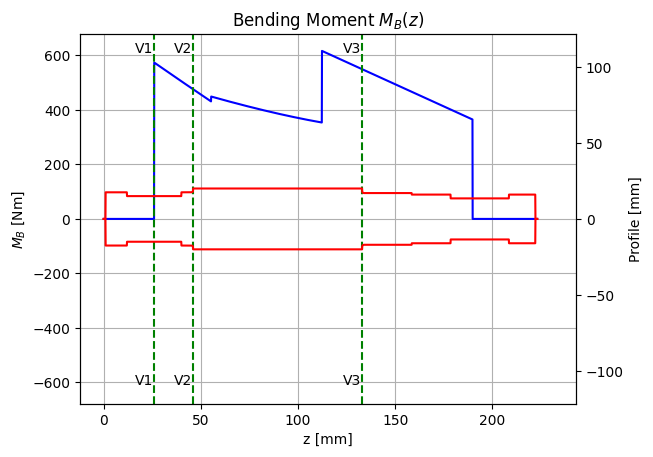

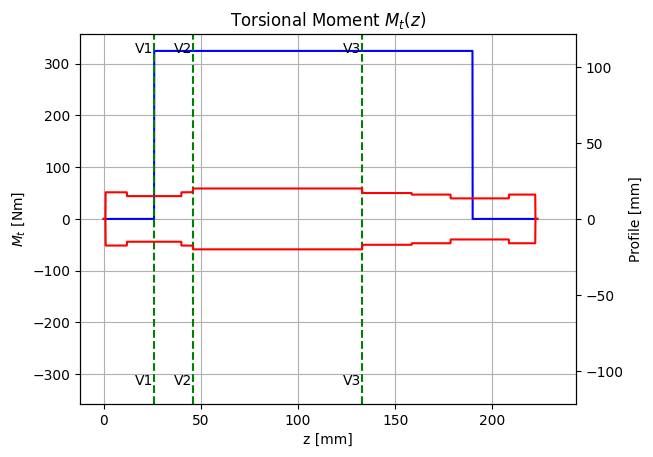

In [28]:
# Plot internal loads
A2.plotInternalLoads()

In [29]:
# Calculate stresses
A2.calculateStresses()
A2.calculateEquivalentAndIdealStress()

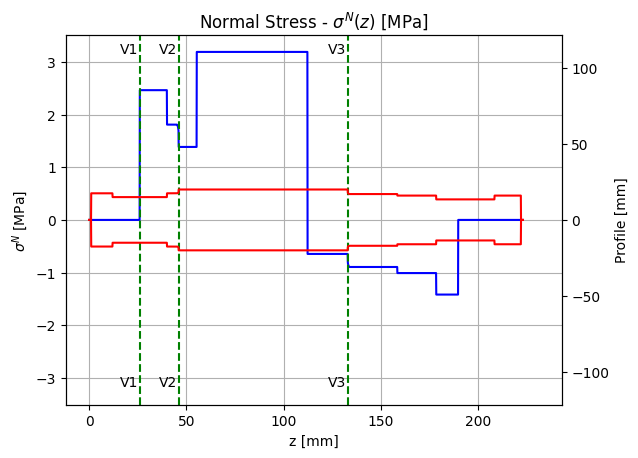

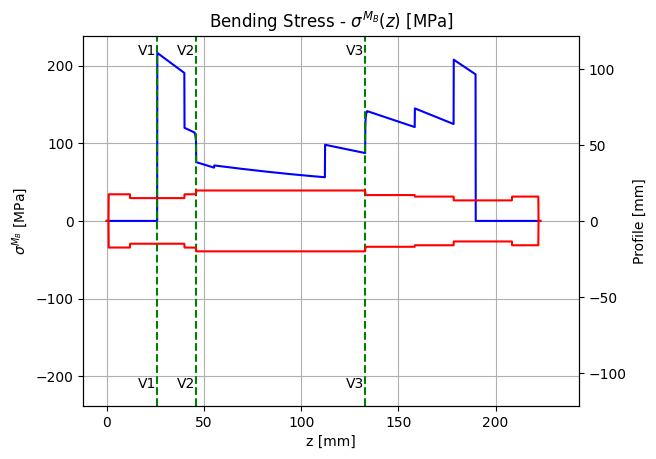

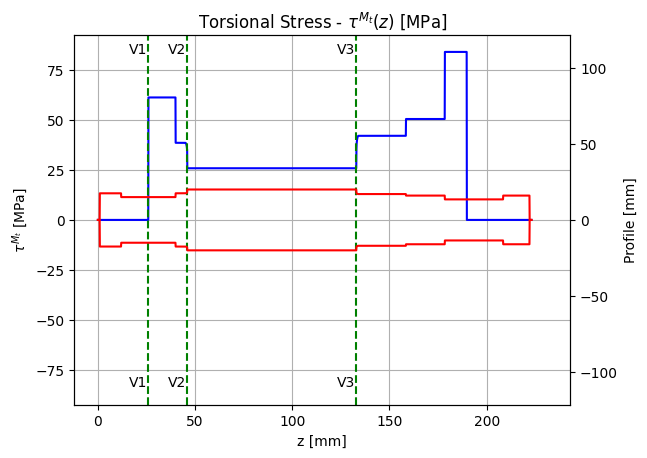

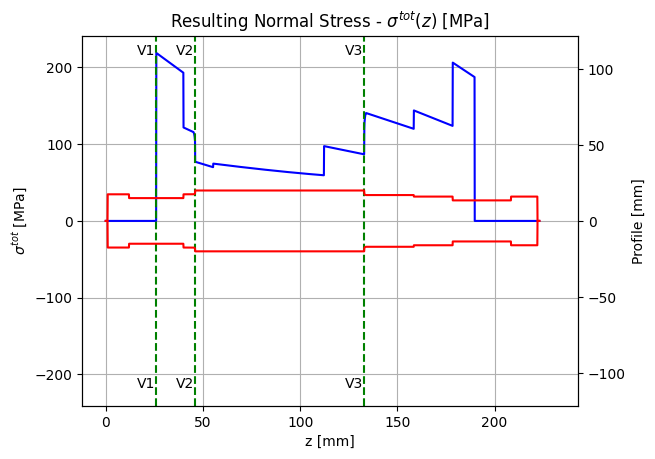

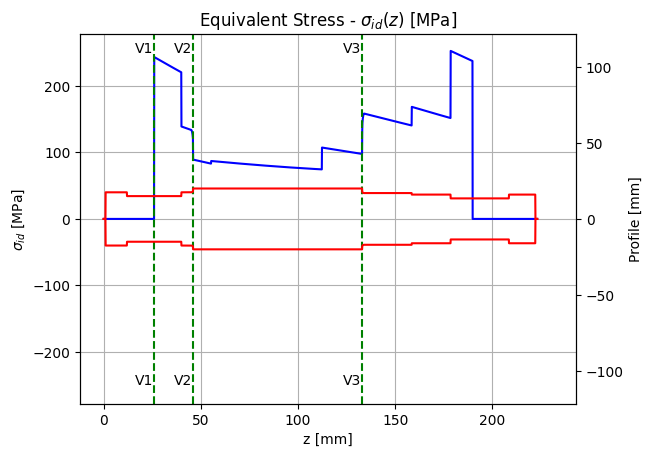

In [30]:
A2.plotStresses()

In [31]:
# Static safety factors
A2.calculateStaticSafetyFactor(sections=userSections)

In [32]:
userSections[0].staticSF, userSections[1].staticSF, userSections[2].staticSF

(np.float64(3.9057020683493078),
 np.float64(10.657764623411172),
 np.float64(7.09062645033194))

In [33]:
# Shaft A2: profile for fatigue verification
fatigueProfile = pygritbx.ShaftProfile(np.array([34, 35, 35, 40, 40, 34, 34, 32, 32, 31]) / 2,
                                     np.array([0, 1, 45.9, 46, 132.9, 133, 158.4, 158.5, 222, 223]))
fatigueProfile.AddFillet(1, [2], 45, 18.5)
fatigueProfile.AddFillet(1, [1], 134, 18)
fatigueProfile_refined = fatigueProfile.refineProfile(0.1)
A2.setProfile(fatigueProfile_refined)
A2.profile.CalculateSectionProperties()
A2.sections[0].d = 35
userSections[0].d = 35

In [34]:
# Recalculate internal loads and stresses
A2.calculateInternalLoads(np.array([i, j, k]))
A2.calculateStresses()

In [35]:
# Recalculate total and equivalent stress
A2.calculateEquivalentAndIdealStress()

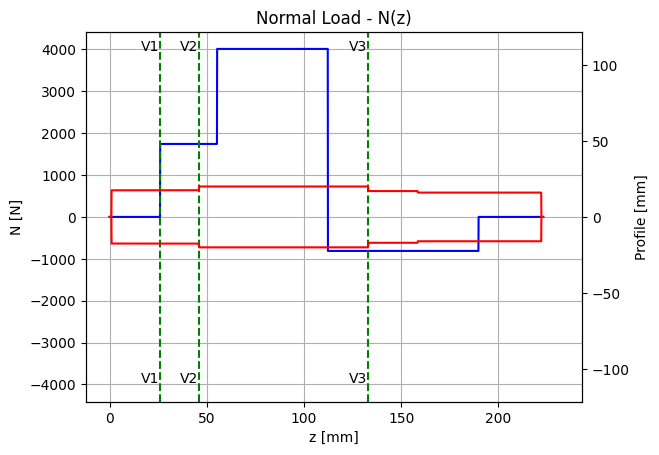

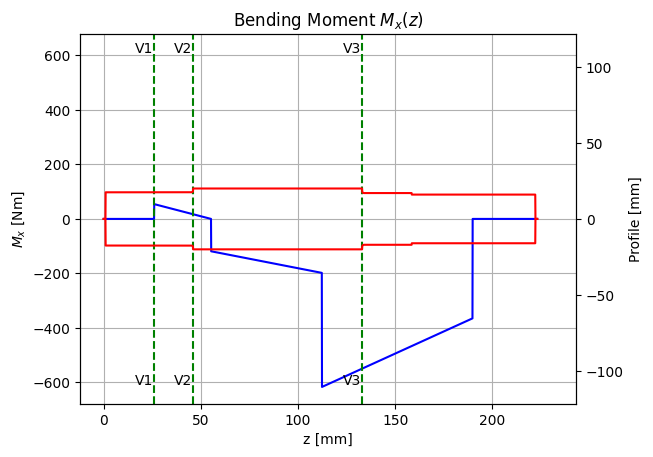

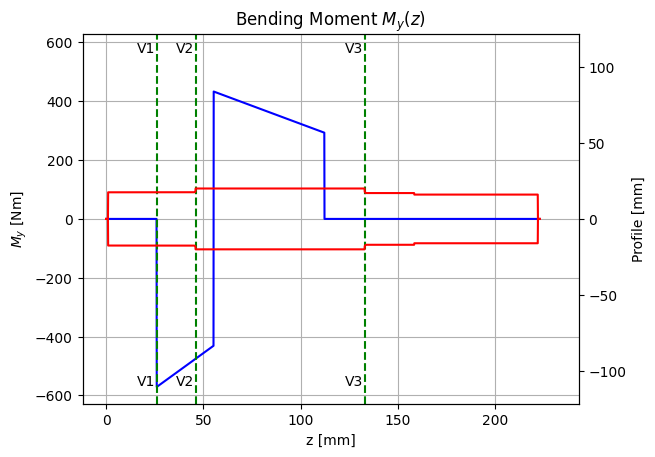

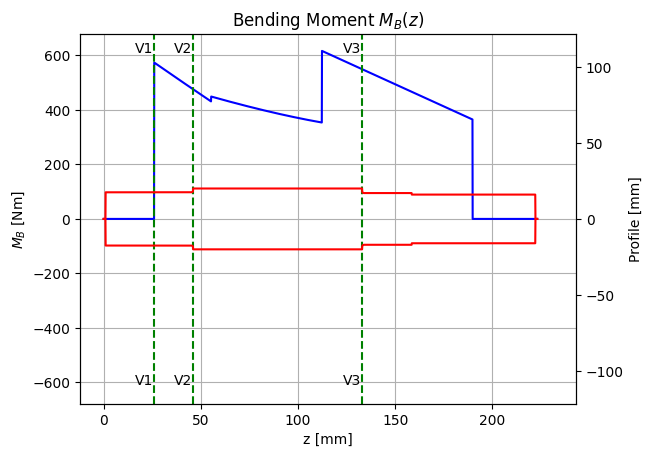

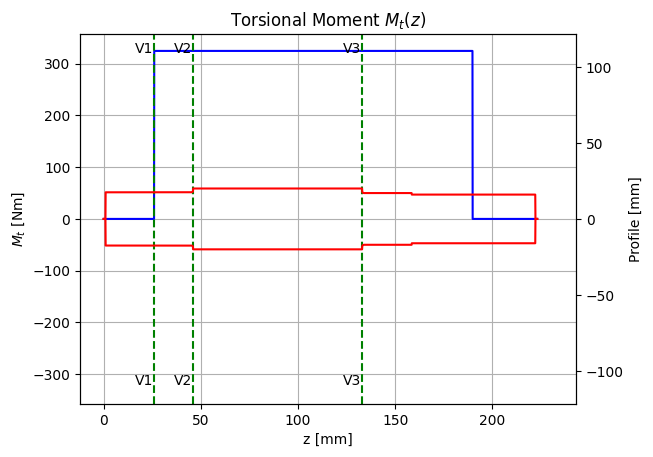

In [36]:
# replot internal loads and stress
A2.plotInternalLoads()

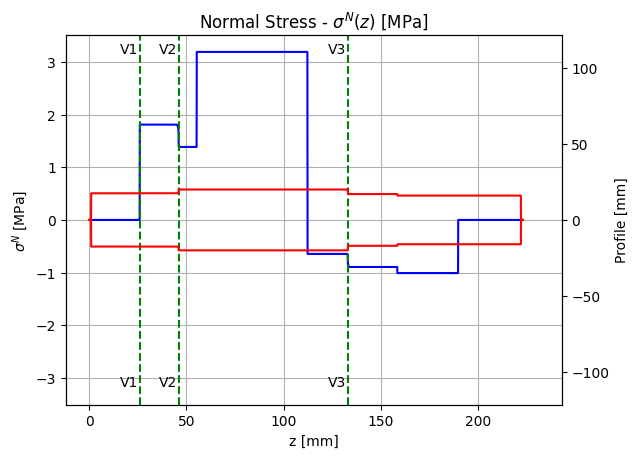

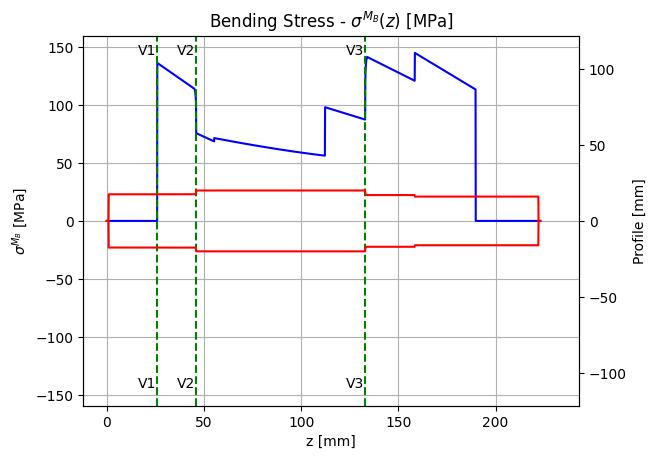

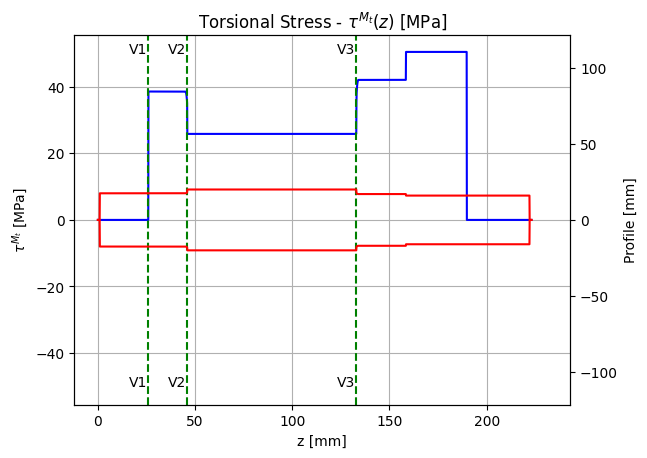

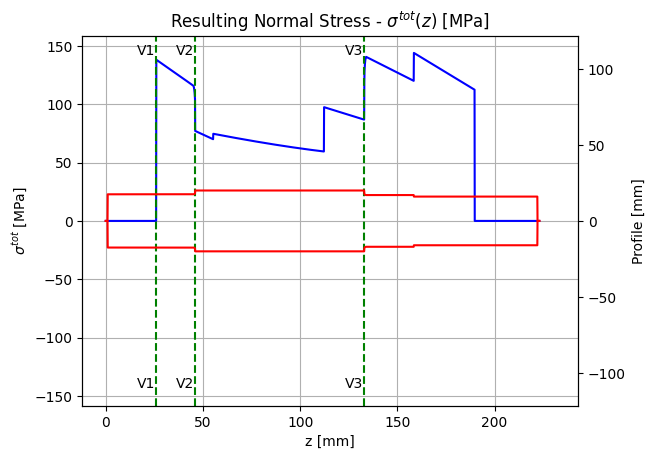

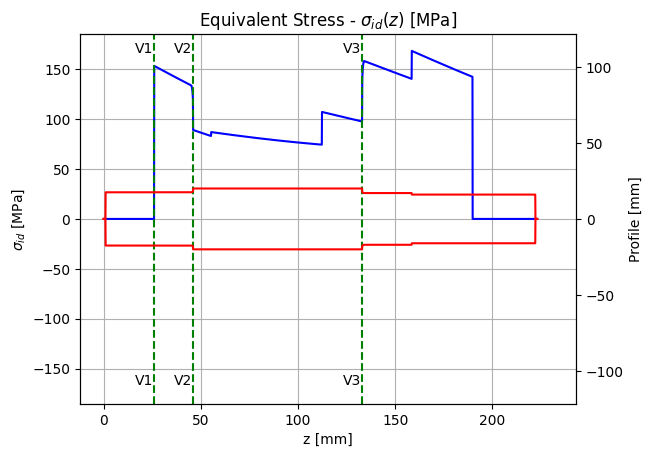

In [37]:
# Replot stresses
A2.plotStresses()

In [38]:
# Calculate mean and alternating stresses
A2.calculateMeanAlternatingStress(userSections)

In [39]:
# Fatigue limit corrector factor
A2.insertFLCF(userSections)

In [40]:
# Equivalent mean and alternating stress
A2.calculateEquivalentStresses(userSections)

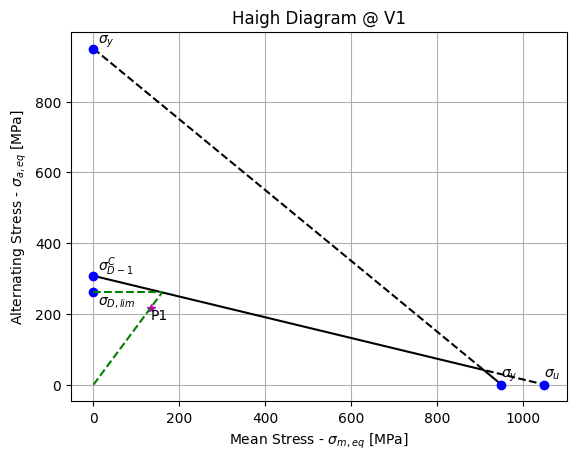

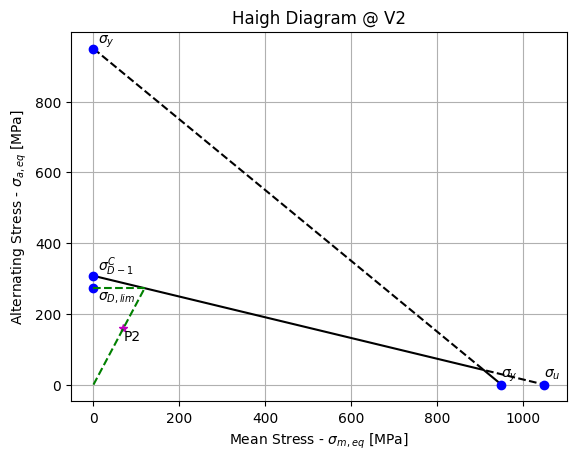

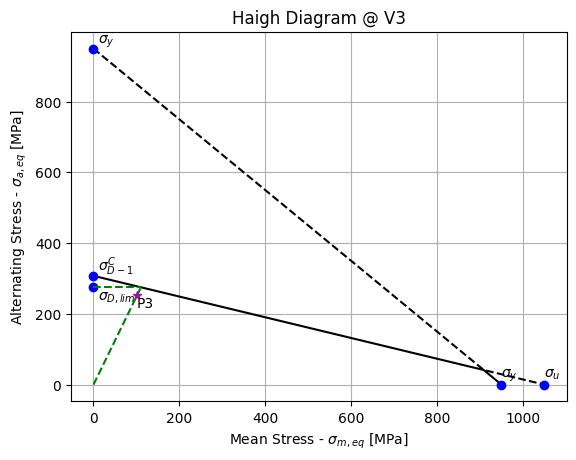

In [41]:
# Plot haigh diagram
for section in userSections:
    section.PlotHaighDiagram()

In [42]:
# Fatigue sagety factor
for section in A2.sections:
    section.CalculateFatigueSF()
    print(f"{section.name}: {section.fatigueSF}")

V1: 1.1959066604234896
V2: 1.7164986583519595
V3: 1.089561293060325


In [43]:
# Maximum tooth gear bending stress
R1.calculateSigmaMaxFatigue(M1, "Uniform", "Uniform", 35, 1, "uncrowned teeth", a1 + b1 + 50, "Commercial, enclosed units")
R3.calculateSigmaMaxFatigue(M2, "Uniform", "Uniform", 30, 1, "uncrowned teeth", 70, "Commercial, enclosed units")

In [44]:
R1.sigma_max_fatigue, R3.sigma_max_fatigue

(np.float64(119.74389319727062), np.float64(182.57064830731142))

In [45]:
# Bending safety factor
R1.calculateBendingSF(320, 1.3558, -0.0178, 1e8, 60, 0.99)
R3.calculateBendingSF(450, 1.3558, -0.0178, 1e8, 60, 0.99)

In [46]:
R1.bendingSF, R3.bendingSF

(array([2.61031088]), array([2.40756037]))

In [47]:
# Maximum gear contact (pitting resistance) stress
R1.calculateSigmaMaxPitting(M1, 1)
R3.calculateSigmaMaxPitting(M2, 1)

In [48]:
R1.sigma_max_pitting, R3.sigma_max_pitting

(np.float64(368.73247290670486), np.float64(662.6675383264222))

In [49]:
# Wear safety factor
R1.calculateWearSF(860, 1.4488, -0.023, 1e8, M1)
R3.calculateWearSF(1360, 1.4488, -0.023, 1e8, M2)

In [50]:
R1.wearSF, R3.wearSF

(array([2.21205287]), array([1.96852218]))

In [51]:
A.performLifeAnalysis(rel=95, condition="Slight contamination", a_skf=2)

Initiating Life Analysis on bearing A.
Checking minimum load condition.
Bearing A satisfies minimium load condition.
Calculating static safety factor.
Bearing A's equivalent static load: 4611.02 [N].
Bearing A's static safety factor: 4.03 [-].
Calculating reliability factor.
Bearing A's reliability factor: 0.64 [-].
Calculating equivalent dynamic load.
Bearing A's equivalent dynamic load: 2341.82 [N].
Calculating contamination factor based on given condition: 'Slight contamination'.
Bearing A's contamination factor: 0.40 [-].
Calculating bearing life.
Bearing A life analysis results: 2750.55 [million cycles] | 22921.26 [hours].


In [52]:
B.performLifeAnalysis(rel=95, condition="Slight contamination", a_skf=5)

Initiating Life Analysis on bearing B.
Checking minimum load condition.
Bearing B satisfies minimium load condition.
Calculating static safety factor.
Bearing B's equivalent static load: 3242.83 [N].
Bearing B's static safety factor: 5.74 [-].
Calculating reliability factor.
Bearing B's reliability factor: 0.64 [-].
Calculating equivalent dynamic load.
Bearing B's equivalent dynamic load: 2535.31 [N].
Calculating contamination factor based on given condition: 'Slight contamination'.
Bearing B's contamination factor: 0.40 [-].
Calculating bearing life.
Bearing B life analysis results: 5277.55 [million cycles] | 43979.59 [hours].


In [53]:
C.performLifeAnalysis(rel=95, condition="Slight contamination", a_skf=1)

Initiating Life Analysis on bearing C.
Checking minimum load condition.
Bearing C satisfies minimium load condition.
Calculating static safety factor.
Bearing C's equivalent static load: 12931.79 [N].
Bearing C's static safety factor: 5.26 [-].
Calculating reliability factor.
Bearing C's reliability factor: 0.64 [-].
Calculating equivalent dynamic load.
Bearing C's equivalent dynamic load: 10889.77 [N].
Calculating contamination factor based on given condition: 'Slight contamination'.
Bearing C's contamination factor: 0.40 [-].
Calculating bearing life.
Bearing C life analysis results: 412.11 [million cycles] | 37385.26 [hours].


In [54]:
D.performLifeAnalysis(rel=95, condition="Slight contamination", a_skf=2)

Initiating Life Analysis on bearing D.
Checking minimum load condition.
Bearing D satisfies minimium load condition.
Calculating static safety factor.
Bearing D's equivalent static load: 14096.17 [N].
Bearing D's static safety factor: 4.82 [-].
Calculating reliability factor.
Bearing D's reliability factor: 0.64 [-].
Calculating equivalent dynamic load.
Bearing D's equivalent dynamic load: 6535.63 [N].
Calculating contamination factor based on given condition: 'Slight contamination'.
Bearing D's contamination factor: 0.40 [-].
Calculating bearing life.
Bearing D life analysis results: 4520.12 [million cycles] | 410048.55 [hours].


In [ ]:
# Define oil of choice
oil = pygritbx.Oil("ISO VG 100", 60, 15, 45)